
Consigna 1)

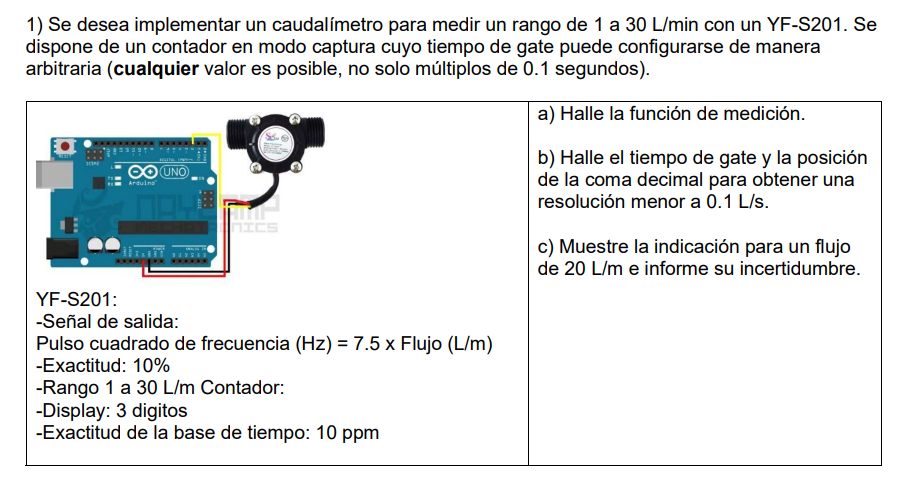


In [31]:
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive

def calcular_cuentas(flujo, Tgate):
    cte_sensor = 7.5
    cuentas = Tgate * cte_sensor * flujo

    uc_contador_rel = ((10 / 1e6) + 1/cuentas) / np.sqrt(3)
    uc_sensor_rel = 10 / (np.sqrt(3)*100)
    uc_total_rel = np.sqrt(uc_contador_rel**2 + uc_sensor_rel**2)

    k = 0
    if (10 * uc_contador_rel < uc_sensor_rel) or (uc_contador_rel > uc_sensor_rel * 10):
        print("La distribucion es Cuadrada")
        k = np.sqrt(3)
    else:
        print("La distribucion es gaussiana por TCL")
        k = 2

    Uc_total = uc_total_rel * cuentas * k

    print(f"Para el caudal {round(flujo)}L/min y TG {round(Tgate,3)} se obtuvo una medición de = ({round(cuentas, 0)}+-{round(Uc_total, 0)}) cuentas al 95% de confianza ")

# Crear sliders interactivos
slider_flujo = widgets.FloatSlider(value=20, min=1, max=30, step=1, description='Flujo')
slider_Tgate = widgets.FloatSlider(value=4/3, min=0.5, max=10, step=0.001, description='Tgate')

# Crear la interactividad
interactive_plot = interactive(calcular_cuentas, flujo=slider_flujo, Tgate=slider_Tgate)

# Mostrar los sliders y ejecutar la función
output = interactive_plot.children[-1]
output.layout.height = '150px'  # Ajusta la altura aquí
interactive_plot



interactive(children=(FloatSlider(value=20.0, description='Flujo', max=30.0, min=1.0, step=1.0), FloatSlider(v…

NOTAS: En este caso la incertidumbre es dominada por la incertidubre del sensor que es de 10%. 
Se determina un TG tal que la medicion de las cuentas coincida con el valor de flujo medido.



Consigna 2)

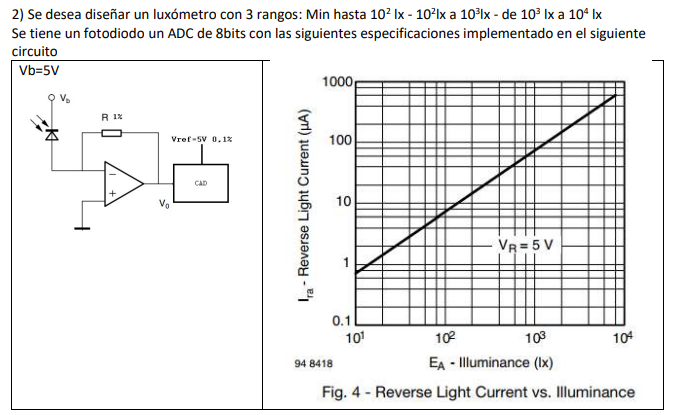


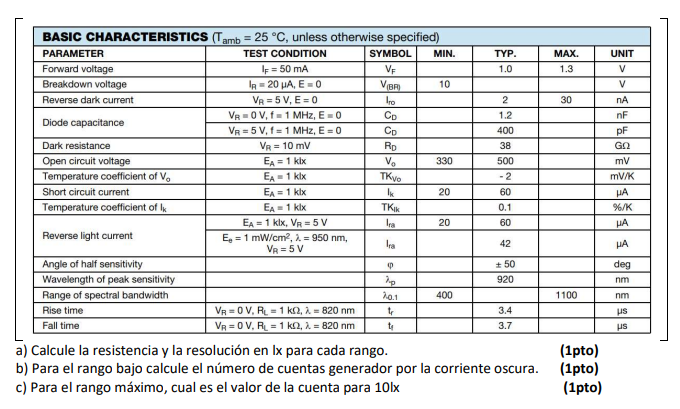


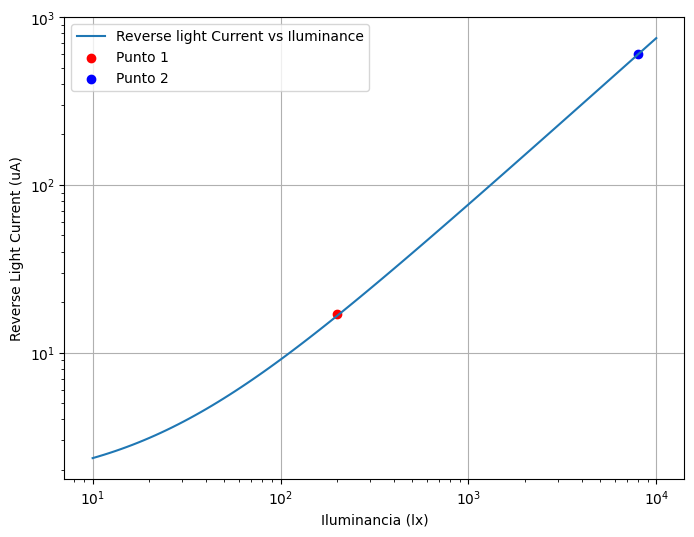

interactive(children=(FloatLogSlider(value=100.0, description='lx_medidos', min=1.0, step=0.2), Output()), _do…

In [41]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, widgets
from IPython.display import display

plt.close("all")

plt.close("all")


# Datos para la recta
iluminancia = np.logspace(1, 4, 100)  # Genera valores de iluminancia en escala logarítmica
m = 7.48e-8
b = 1.6e-6
corriente = (m* iluminancia + b) * 1e6 # pongo en unidades de uA

# Puntos a marcar en la recta
punto1 = (200, 17)  # Iluminancia, Corriente
punto2 = (8e3, 600)  # Iluminancia, Corriente

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.grid()
plt.plot(iluminancia, corriente, label='Reverse light Current vs Iluminance')

# Marcar los puntos en la recta
plt.scatter(*punto1, color='red', label='Punto 1')
plt.scatter(*punto2, color='blue', label='Punto 2')

# Configurar ejes y etiquetas
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Iluminancia (lx)')
plt.ylabel('Reverse Light Current (uA)')

plt.legend()


rango_sup = 1e2
rango_inf = 0

## Datos de problema
vref = 5
N=8
deltaR = 1 #%
deltaVref = 0.1 #%

def update(lx_medidos):

   
    R= vref / ((m* rango_sup + b))

    sensibilidad = vref / ((2**N -1) * R * m)
    
    cuentas = R * (2**N - 1)*  ((m* lx_medidos + b)) / vref
    if(cuentas>255):
        print("Fuera de escala")
        return
        
    print(f"La resistencia adecuada es de R = {round(R,2)} ohms")
    print(f"La sensibilidad para esta escala es de S = {round(sensibilidad,2)} lx")

    

    uc_r_rel = deltaR/(100 * np.sqrt(3))
    uc_vref_rel = deltaVref/(100 * np.sqrt(3))

    k=0
    if  (10* uc_r_rel <= uc_vref_rel) or  (uc_r_rel >= uc_vref_rel*10 ):
        print("La distribucion es Cuadrada")
        k=np.sqrt(3)
    else:
        print("La distribucion es gaussiana por TCL")
        k=2    

    uc_tot_rel = np.sqrt(uc_r_rel**2 + uc_vref_rel**2)
    UC_TOT = uc_tot_rel * cuentas * k

    print(f"Se obtuvo una cantidad de cuentas = ({round(cuentas,0)}+-{round(UC_TOT,0)})cuentas al 95%")



interact(update, lx_medidos=widgets.FloatLogSlider(value=1e2, base=10, min=1, max=4, step=0.2, description='lx_medidos'))
plt.show()


Consigna 3)

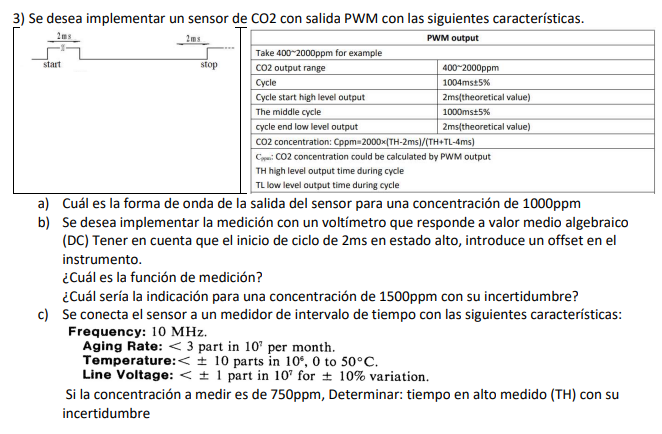


In [18]:
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt

# Datos
Fbt = 10e6 
T = 1004e-3
delta_T = 5  # %
Tstart = 2e-3
Tstop = 2e-3

def calculo_TH(cppm, verbose):
    TH = (cppm * (T - (Tstart + Tstop)) / (2000)) + Tstart
    TL = T - TH

    if verbose:
        print(f"El tiempo en alto es: {round(TH*1e3)}ms, el tiempo en bajo es: {round(TL*1e3)}ms, el duty es de: {round(TH*100/T,1)}%")

    cuentas = TH * Fbt

    delta_fbt_rel = 13.6e-6 
    delta_N_rel = 1 / cuentas

    u_fi_rel = (delta_fbt_rel + delta_N_rel) / np.sqrt(3)

    u_th_rel = cppm * delta_T * T / (100 * np.sqrt(3) * 2000 * TH)

    uc_cuentas_rel = np.sqrt(u_fi_rel**2 + u_th_rel**2)

    k = 0
    if (10 * u_th_rel <= u_fi_rel) or (u_th_rel >= u_fi_rel * 10):
        if verbose:
            print("La distribucion es Cuadrada")
        k = np.sqrt(3)
    else:
        if verbose:
            print("La distribucion es gaussiana por TCL")
        k = 2

    UC_Tot = uc_cuentas_rel * k * cuentas

    if verbose:
        print(f"El valor obtenido por el contador es: ({round(cuentas)}+-{round(UC_Tot)})cuentas al 95% de confianza")

    vdc = ((cppm * (T - (Tstart + Tstop)) / 2000) + Tstart) / T

    if verbose:
        print(f"El valor obtenido por el multimetro es: {round(vdc,2)}V")

    return TH

# Función para actualizar el gráfico
def update_plot(cppm):
    TH = calculo_TH(cppm, True)
    duty = TH / T
    x = np.linspace(0, 2*T, 1000)
    y = np.where((x % T) < (duty * T), 1, 0)
    
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.plot(x, y)
    plt.title("Sensor PWM output VS Concentration[ppm]")
    plt.xlabel("Tiempo [S]")
    plt.ylabel("Vo [V] ")
    plt.grid(True)
    plt.show()

# Crear el slider interactivo
slider = widgets.FloatSlider(value=750, min=400, max=2000, step=10, description='Concentracion[ppm]')

# Crear la interactividad
interactive_plot = interactive(update_plot, cppm=slider)

# Mostrar el slider y el gráfico
output = interactive_plot.children[-1]
output.layout.height = '250px'  # Ajusta la altura aquí
interactive_plot


interactive(children=(FloatSlider(value=750.0, description='Concentracion[ppm]', max=2000.0, min=400.0, step=1…